In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from skimage.io import imread
from skimage.segmentation import mark_boundaries
from skimage.util import montage
from skimage.morphology import label

In [ ]:
train_image_dir='E:/6 TH SEM/CP/DL/DL_CP/archive2/train_v2'
test_image_dir='E:/6 TH SEM/CP/DL/DL_CP/archive2/test_v2'

In [ ]:
train_images=os.listdir(train_image_dir)
train_images.sort()
print(f"Total of {len(train_images)} images in train directory.\nHere is how first five train_images looks like:- {train_images[:5]}")

Total of 192556 images in train directory.
Here is how first five train_images looks like:- ['00003e153.jpg', '0001124c7.jpg', '000155de5.jpg', '000194a2d.jpg', '0001b1832.jpg']


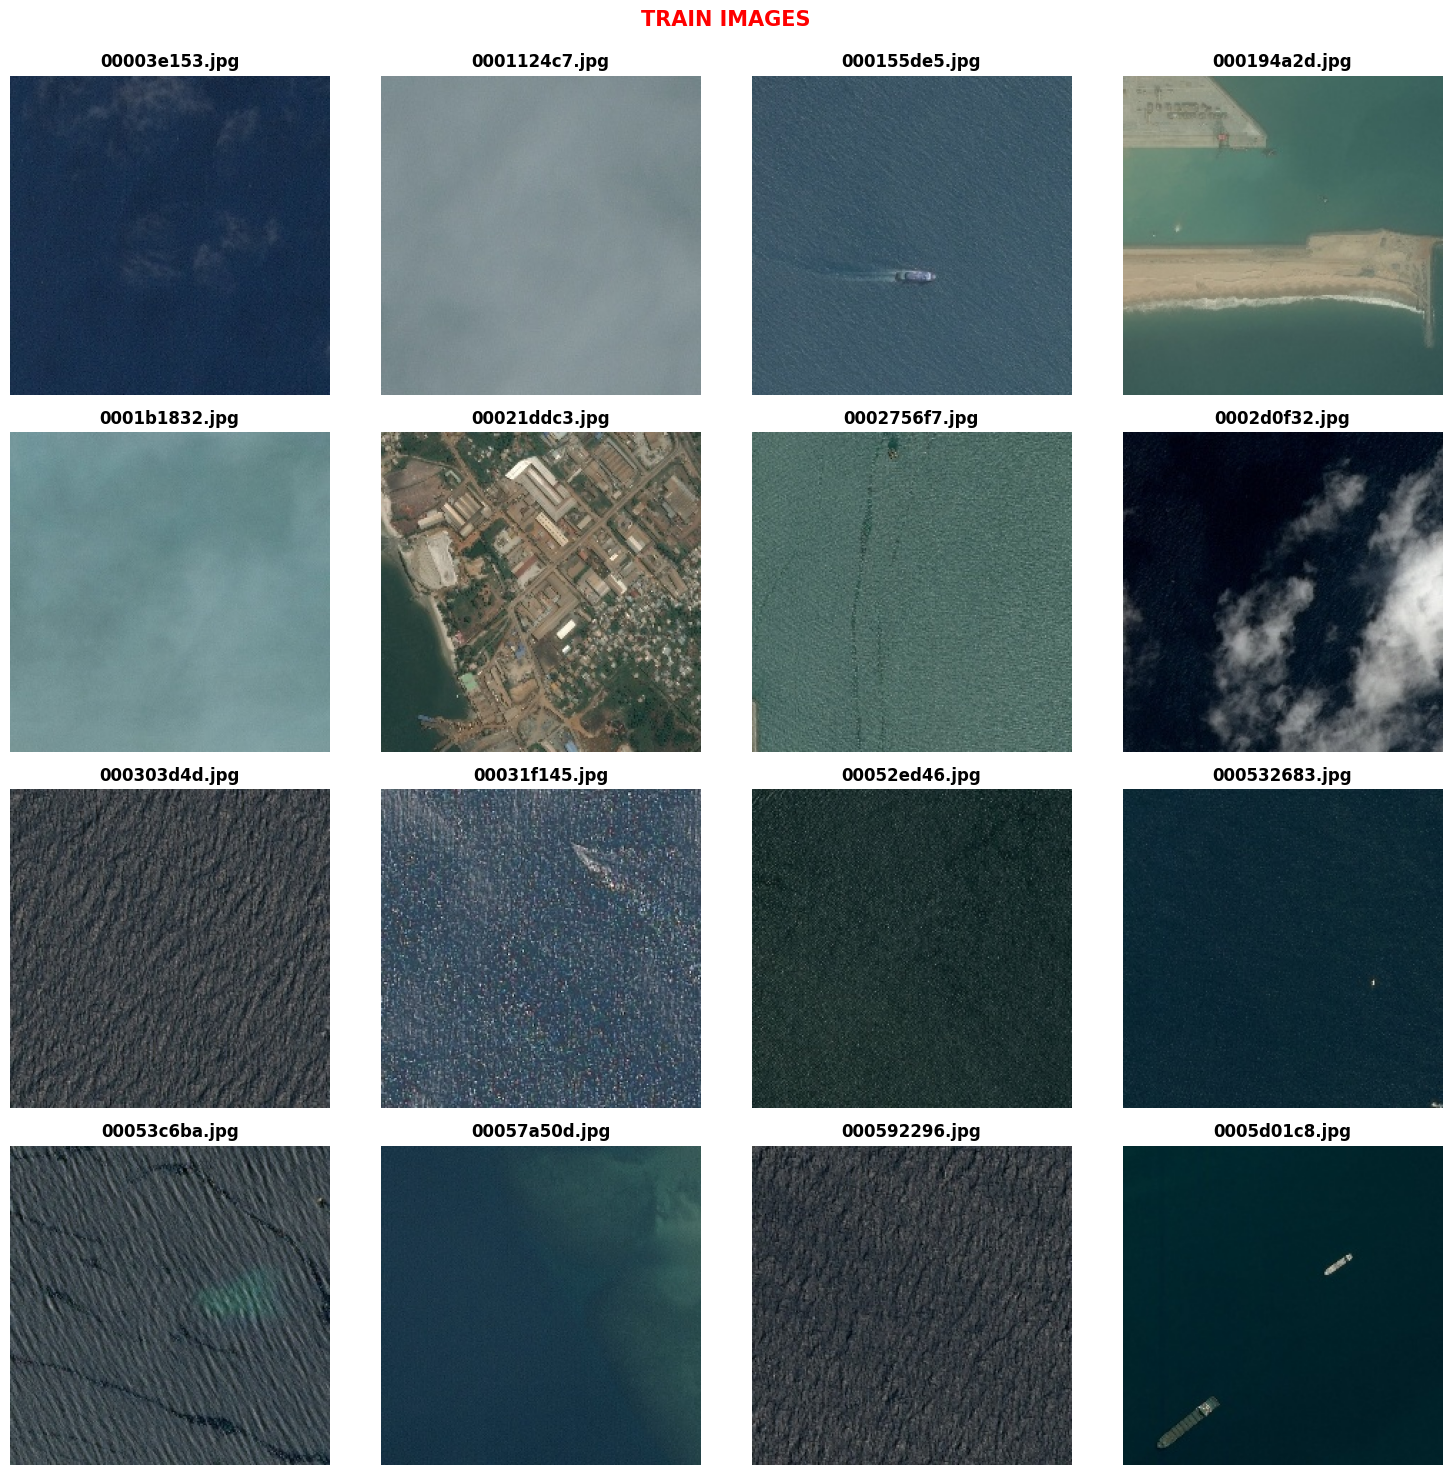

In [ ]:
plt.figure(figsize=(15,15))
plt.suptitle('TRAIN IMAGES\n', weight = 'bold', fontsize = 15, color = 'r')
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(imread(train_image_dir + "/" + train_images[i]))
    plt.title(f"{train_images[i]}", weight = 'bold')
    plt.axis('off')
plt.tight_layout()

In [ ]:
masks=pd.read_csv('E:/6 TH SEM/CP/DL/DL_CP/archive2/train_ship_segmentations_v2.csv')
masks.head(10)

ImageId                                      EncodedPixels
0  00003e153.jpg                                                NaN
1  0001124c7.jpg                                                NaN
2  000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...
3  000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...
4  000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
5  000194a2d.jpg  198320 10 199088 10 199856 10 200624 10 201392...
6  000194a2d.jpg  55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...
7  000194a2d.jpg  254389 9 255157 17 255925 17 256693 17 257461 ...
8  0001b1832.jpg                                                NaN
9  00021ddc3.jpg  108287 1 109054 3 109821 4 110588 5 111356 5 1...

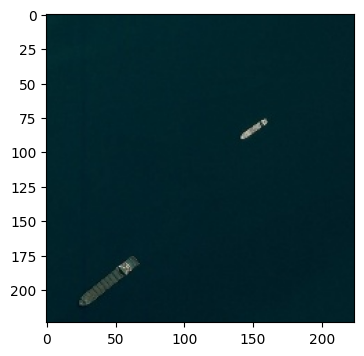

In [ ]:
img_arr = imread(train_image_dir + '/' + '0005d01c8.jpg')
plt.figure(figsize=(10,4))
plt.imshow(img_arr)
plt.show()

In [ ]:
rle_0 = masks.query('ImageId=="0005d01c8.jpg"')['EncodedPixels']
rle_0

29    56010 1 56777 3 57544 6 58312 7 59079 9 59846 ...
30    365871 1 366638 3 367405 6 368173 7 368940 9 3...
Name: EncodedPixels, dtype: object

In [ ]:
mask_lst, ct = [], 1
for mask in rle_0:
    print(f"Mask {ct} -\n{mask}\n\n")
    mask_lst.append(mask)
    ct+=1

Mask 1 -
56010 1 56777 3 57544 6 58312 7 59079 9 59846 11 60613 14 61380 16 62148 17 62915 19 63682 22 64449 24 65216 26 65984 27 66751 30 67518 32 68285 34 69052 36 69820 38 70587 40 71354 42 72121 42 72888 42 73656 42 74423 42 75190 42 75957 42 76724 42 77492 42 78259 42 79026 42 79793 42 80560 42 81328 42 82095 42 82862 42 83629 42 84396 42 85164 42 85931 42 86698 42 87465 42 88232 42 89000 42 89767 42 90534 42 91301 42 92068 42 92836 42 93603 42 94370 42 95137 42 95904 42 96672 42 97439 42 98206 42 98973 42 99740 42 100508 42 101275 42 102042 42 102809 42 103576 42 104344 42 105111 42 105878 42 106645 42 107412 42 108180 42 108947 42 109714 42 110481 42 111249 41 112016 42 112783 42 113550 42 114317 42 115085 41 115852 42 116619 42 117386 42 118153 42 118921 41 119688 42 120455 42 121222 42 121989 42 122757 41 123524 42 124291 42 125058 42 125825 42 126593 42 127360 42 128127 42 128894 42 129661 42 130429 42 131196 42 131963 42 132730 42 133497 42 134265 42 135032 42 135799 42 1365

In [ ]:
split = mask_lst[0].split()
print(split)

['56010', '1', '56777', '3', '57544', '6', '58312', '7', '59079', '9', '59846', '11', '60613', '14', '61380', '16', '62148', '17', '62915', '19', '63682', '22', '64449', '24', '65216', '26', '65984', '27', '66751', '30', '67518', '32', '68285', '34', '69052', '36', '69820', '38', '70587', '40', '71354', '42', '72121', '42', '72888', '42', '73656', '42', '74423', '42', '75190', '42', '75957', '42', '76724', '42', '77492', '42', '78259', '42', '79026', '42', '79793', '42', '80560', '42', '81328', '42', '82095', '42', '82862', '42', '83629', '42', '84396', '42', '85164', '42', '85931', '42', '86698', '42', '87465', '42', '88232', '42', '89000', '42', '89767', '42', '90534', '42', '91301', '42', '92068', '42', '92836', '42', '93603', '42', '94370', '42', '95137', '42', '95904', '42', '96672', '42', '97439', '42', '98206', '42', '98973', '42', '99740', '42', '100508', '42', '101275', '42', '102042', '42', '102809', '42', '103576', '42', '104344', '42', '105111', '42', '105878', '42', '10664

In [ ]:
# Grab all the starting pixels and lenghts and convert it into integers using numpy
starts, lengths = [np.array(x, dtype = int) for x in (split[::2], split[1::2])]
starts, lengths

(array([ 56010,  56777,  57544,  58312,  59079,  59846,  60613,  61380,
         62148,  62915,  63682,  64449,  65216,  65984,  66751,  67518,
         68285,  69052,  69820,  70587,  71354,  72121,  72888,  73656,
         74423,  75190,  75957,  76724,  77492,  78259,  79026,  79793,
         80560,  81328,  82095,  82862,  83629,  84396,  85164,  85931,
         86698,  87465,  88232,  89000,  89767,  90534,  91301,  92068,
         92836,  93603,  94370,  95137,  95904,  96672,  97439,  98206,
         98973,  99740, 100508, 101275, 102042, 102809, 103576, 104344,
        105111, 105878, 106645, 107412, 108180, 108947, 109714, 110481,
        111249, 112016, 112783, 113550, 114317, 115085, 115852, 116619,
        117386, 118153, 118921, 119688, 120455, 121222, 121989, 122757,
        123524, 124291, 125058, 125825, 126593, 127360, 128127, 128894,
        129661, 130429, 131196, 131963, 132730, 133497, 134265, 135032,
        135799, 136566, 137333, 138101, 138868, 139635, 140402, 

In [ ]:
# Get the ending pixels.
'''Examples:-
56010 1 ---> Starts at 56010 and ends at 56010
56777 3 ---> Starts at 56777 and ends at 56779
57544 6 ---> Starts at 57544 and ends at 57549'''
ends = starts + lengths - 1
pd.DataFrame({
    'Starts' : starts,
    'Lengths' : lengths,
    'Ends' : ends
}).head(10)

Starts  Lengths   Ends
0   56010        1  56010
1   56777        3  56779
2   57544        6  57549
3   58312        7  58318
4   59079        9  59087
5   59846       11  59856
6   60613       14  60626
7   61380       16  61395
8   62148       17  62164
9   62915       19  62933

In [ ]:
# Create 1s in place of these pixels and rest should be 0
img = np.zeros(768*768, dtype = np.uint8)
for start, end in zip(starts, ends):
    img[start:end+1] = 1

In [ ]:
# Copy-Paste this idea for another ship in the image
split_1 = mask_lst[1].split()                                                                # Split the mask into start_pixels and lengths
starts, lengths = [np.array(x, dtype = int) for x in (split_1[0:][::2], split_1[1:][::2])]   # Generate arrays from only starts and lengths
ends = starts + lengths - 1                                                                  # Start pixel to end pixel will be start - 1 + length
img1 = np.zeros(768*768, dtype = np.uint8)                                                   # 1D array containing all zeros
for start, end in zip(starts, ends):                                                         # For each start to end pair
    img1[start:end+1] = 1

In [ ]:
img = img.reshape(768, 768)
img1 = img1.reshape(768, 768)
final = img+img1
print(final, '\n\n', final.shape, '\n\n', final.ndim)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

 (768, 768) 

 2


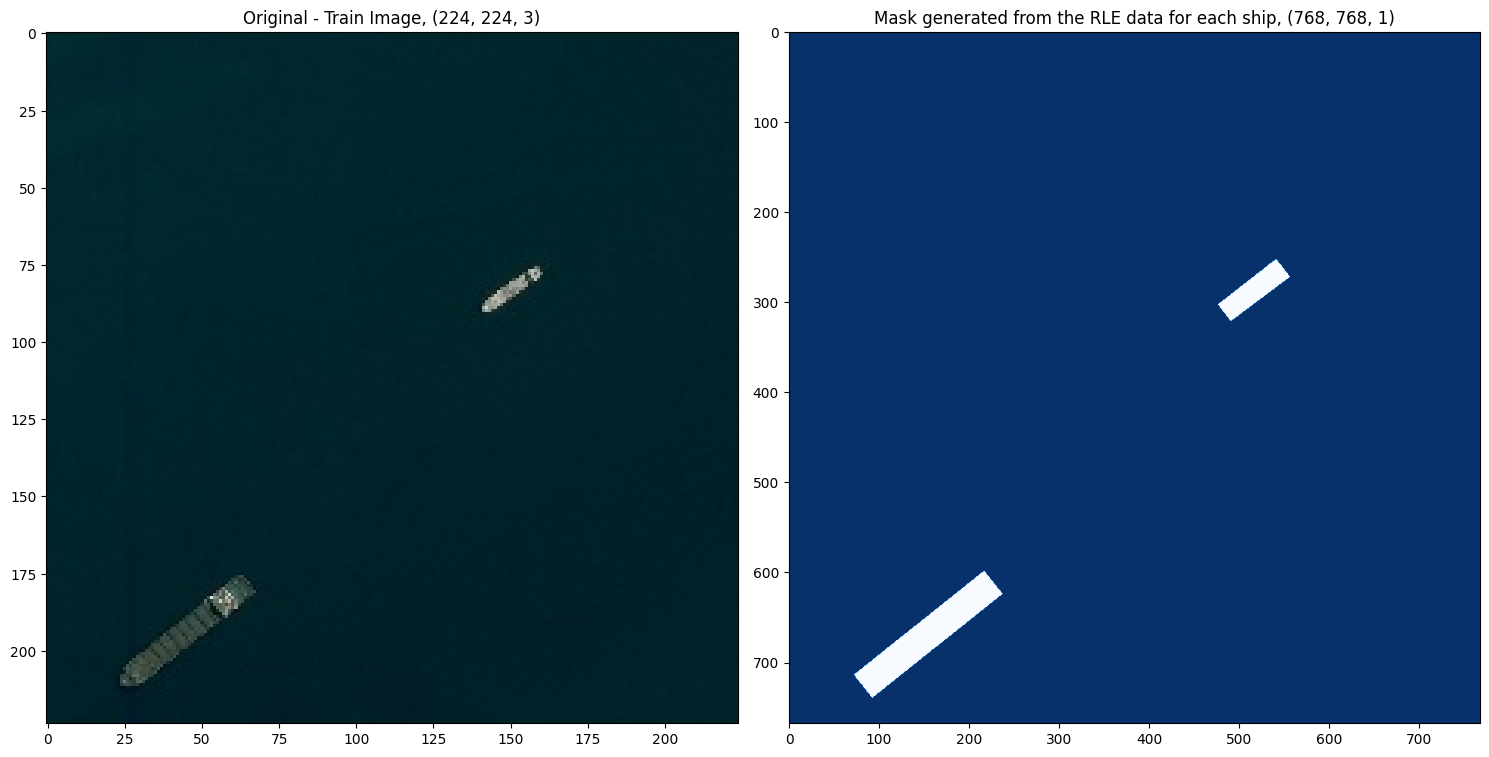

In [ ]:
# Expand dimension of this array to have only 1 channel in the mask and visualise original and final mask
img = img.reshape(768, 768).T     # Transpose the first ship mask
img1 = img1.reshape(768, 768).T   # Transpose the second ship mask
final = img+img1                  # Generate the final mask with two ships
final = np.expand_dims(final, -1)
# Expand dimension of this array to have only 1 channel in the mask and visualise original and final mask # -1 means the last available dimenstion, in this case it is 2. Hence, on axis = 2 we will get 1.
original = imread(train_image_dir+'/'+train_images[15])
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.title(f"Original - Train Image, {original.shape}")
plt.imshow(original)
plt.subplot(1, 2, 2)
plt.title(f"Mask generated from the RLE data for each ship, {final.shape}")
plt.imshow(final, cmap = "Blues_r")
plt.tight_layout()
plt.show()

In [ ]:
import cv2

# Define functions to do these tasks for all the training images
def rle_decode(mask_rle, shape=(768,768)):
    '''
    Input arguments -
    mask_rle: Mask of one ship in the train image
    shape: Output shape of the image array
    '''
    s = mask_rle.split()                                                               # Split the mask of each ship that is in RLE format
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]     # Get the start pixels and lengths for which image has ship
    ends = starts + lengths - 1                                                        # Get the end pixels where we need to stop
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)                                  # A 1D vec full of zeros of size = 768*768
    for lo, hi in zip(starts, ends):                                                   # For each start to end pixels where ship exists
        img[lo:hi+1] = 1                                                               # Fill those values with 1 in the main 1D vector
    '''
    Returns -
    Transposed array of the mask: Contains 1s and 0s. 1 for ship and 0 for background
    '''
    return img.reshape(shape).T

def masks_as_image(in_mask_list):
    '''
    Input -
    in_mask_list: List of the masks of each ship in one whole training image
    '''
    all_masks = np.zeros((768, 768), dtype = np.int16)                                 # Creating 0s for the background
    for mask in in_mask_list:                                                          # For each ship rle data in the list of mask rle
        if isinstance(mask, str):                                                      # If the datatype is string
            all_masks += rle_decode(mask)                                              # Use rle_decode to create one mask for whole image
    all_masks_resized = cv2.resize(all_masks, (224, 224), interpolation=cv2.INTER_LINEAR)
    '''
    Returns -
    Full mask of the training image whose RLE data has been passed as an input
    '''
    return np.expand_dims(all_masks_resized, -1)

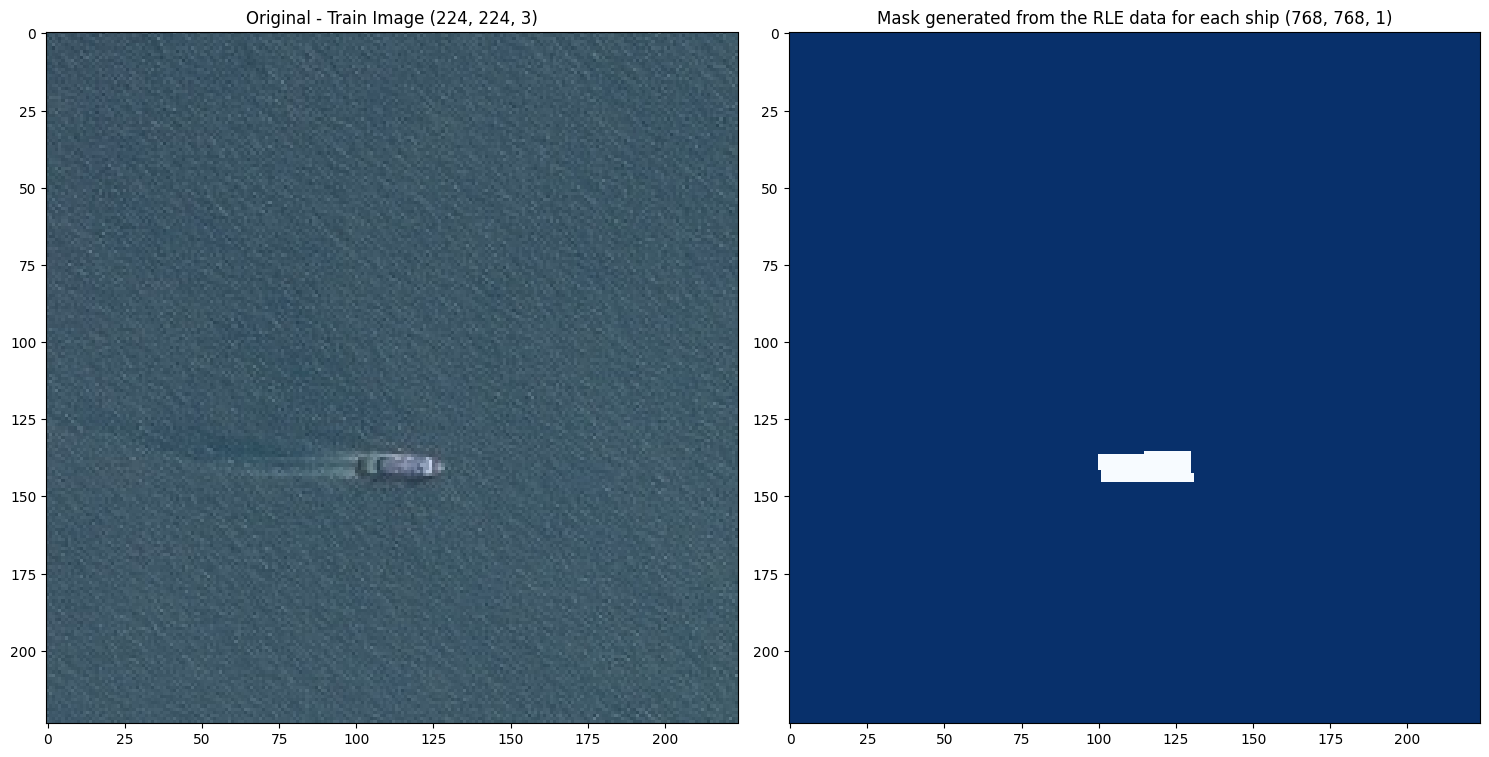

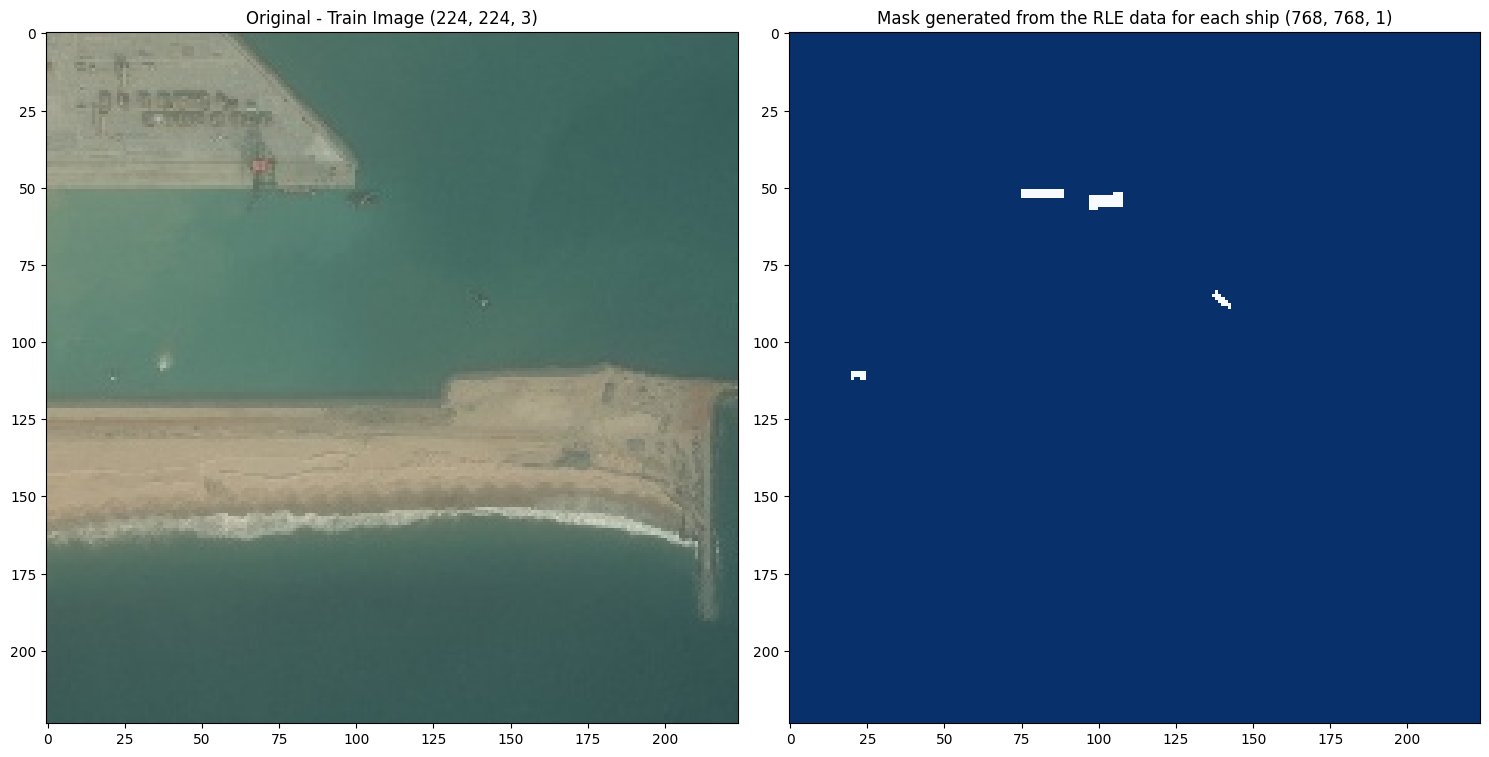

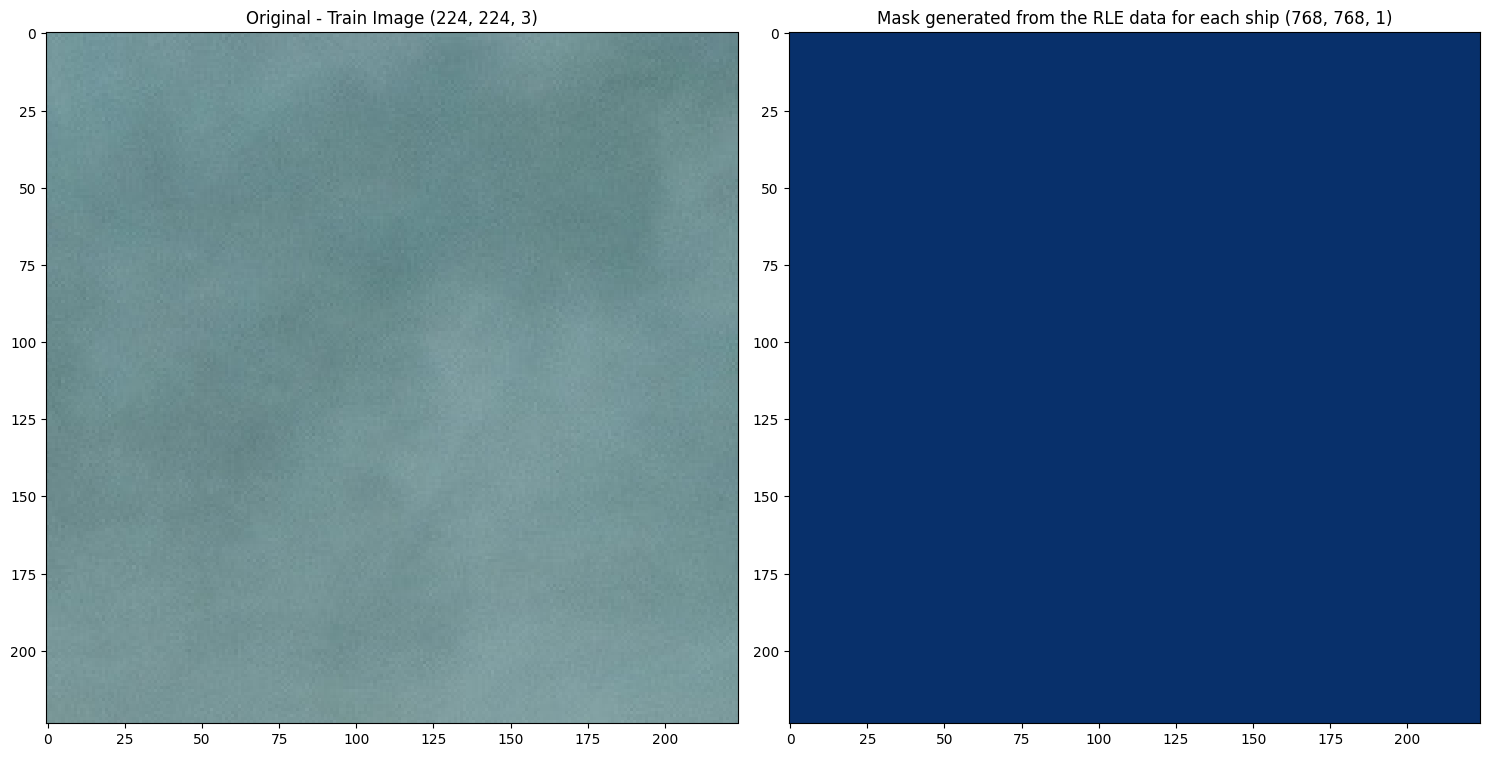

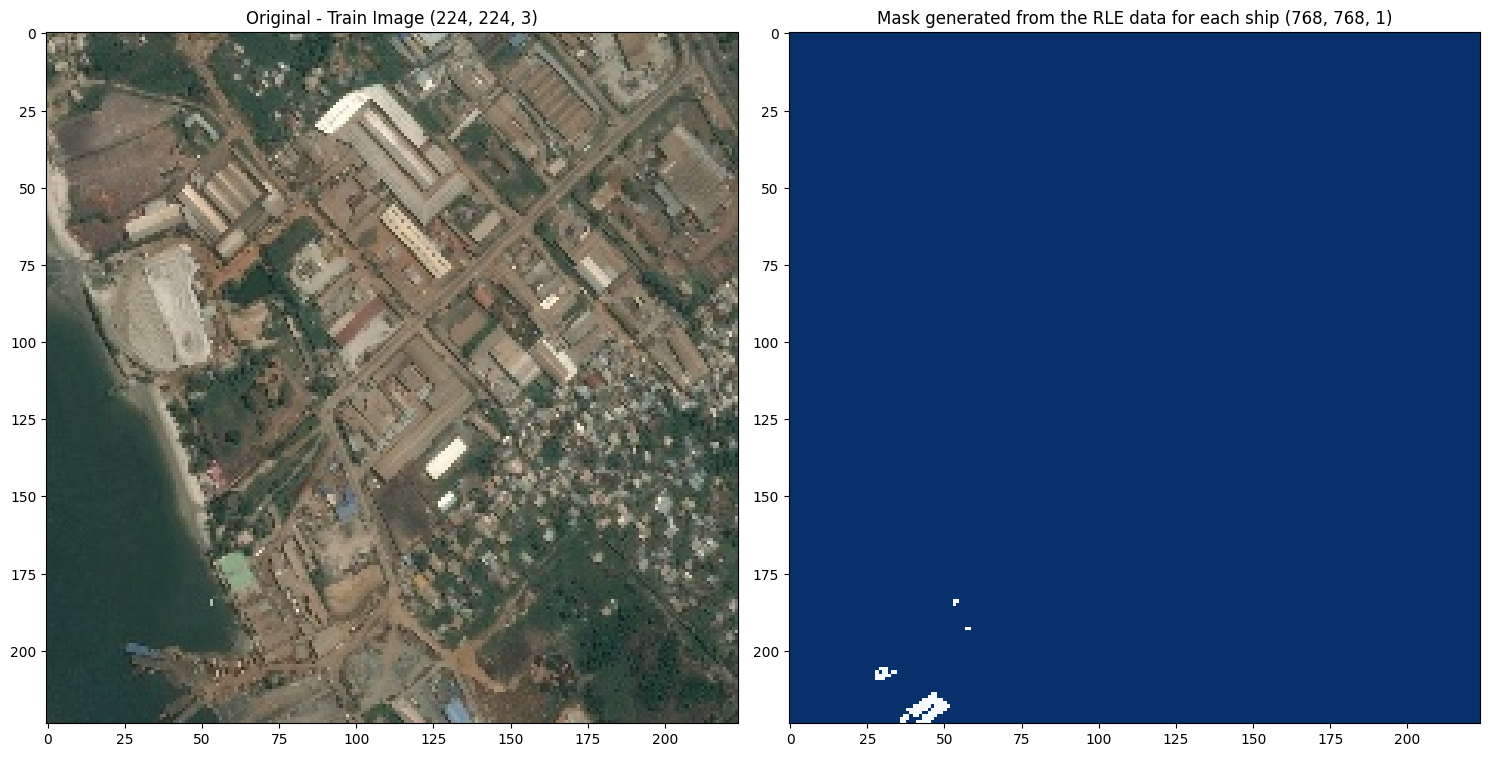

In [ ]:
for num in [3, 4, 5, 6]:
    rle_0 = masks.query(f'ImageId=="{train_images[num-1]}"')['EncodedPixels']
    img_0 = masks_as_image(rle_0)
    original = imread(train_image_dir+"/"+train_images[num-1])
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 2, 1)
    plt.title(f"Original - Train Image {original.shape}")
    plt.imshow(original)
    plt.subplot(1, 2, 2)
    plt.title(f"Mask generated from the RLE data for each ship {final.shape}")
    plt.imshow(img_0, cmap = "Blues_r")
    plt.tight_layout()
    plt.show()

In [ ]:
masks['ships'] = masks['EncodedPixels'].map(lambda c_row: 1 if isinstance(c_row, str) else 0)
masks.head(9)



ImageId                                      EncodedPixels  ships
0  00003e153.jpg                                                NaN      0
1  0001124c7.jpg                                                NaN      0
2  000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...      1
3  000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...      1
4  000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...      1
5  000194a2d.jpg  198320 10 199088 10 199856 10 200624 10 201392...      1
6  000194a2d.jpg  55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...      1
7  000194a2d.jpg  254389 9 255157 17 255925 17 256693 17 257461 ...      1
8  0001b1832.jpg                                                NaN      0

In [ ]:
# Making a new data frame with unique image ids where we are summing up the ship counts
unique_img_ids = masks.groupby('ImageId').agg({'ships': 'sum'}).reset_index()
unique_img_ids.index+=1 # Incrimenting all the index by 1
unique_img_ids.head()

ImageId  ships
1  00003e153.jpg      0
2  0001124c7.jpg      0
3  000155de5.jpg      1
4  000194a2d.jpg      5
5  0001b1832.jpg      0

In [ ]:
# Adding two new features to unique_img_ids data frame. If ship exists in image, val is 1 else 0. And it's vec form
unique_img_ids['has_ship'] = unique_img_ids['ships'].map(lambda x: 1.0 if x>0 else 0.0)
unique_img_ids.head()

ImageId  ships  has_ship
1  00003e153.jpg      0       0.0
2  0001124c7.jpg      0       0.0
3  000155de5.jpg      1       1.0
4  000194a2d.jpg      5       1.0
5  0001b1832.jpg      0       0.0

In [ ]:
# Check the size of the files. Will take some time to run as there are loads of files!!!
unique_img_ids['file_size_kb'] = unique_img_ids['ImageId'].map(lambda c_img_id: os.stat(os.path.join(train_image_dir, c_img_id)).st_size/1024)

In [ ]:
# Keep the files whose size > 35 kB
unique_img_ids = unique_img_ids[unique_img_ids.file_size_kb >10]
unique_img_ids.head()

ImageId  ships  has_ship  file_size_kb
1  00003e153.jpg      0       0.0     17.791016
2  0001124c7.jpg      0       0.0     10.690430
3  000155de5.jpg      1       1.0     21.077148
4  000194a2d.jpg      5       1.0     11.545898
5  0001b1832.jpg      0       0.0     12.523438

In [ ]:
# Also, retrive the old masks data frame
masks.drop(['ships'], axis=1, inplace=True)
masks.index+=1
masks.head()

ImageId                                      EncodedPixels
1  00003e153.jpg                                                NaN
2  0001124c7.jpg                                                NaN
3  000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...
4  000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...
5  000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...

In [ ]:
# Train - Test split
from sklearn.model_selection import train_test_split
train_ids, valid_ids = train_test_split(unique_img_ids, test_size = 0.3, stratify = unique_img_ids['ships'])

In [ ]:
# Create train data frame
train_df = pd.merge(masks, train_ids)

# Create test data frame
valid_df = pd.merge(masks, valid_ids)

In [ ]:
print("There are ~")
print(train_df.shape[0], 'training masks,')
print(valid_df.shape[0], 'validation masks.')

There are ~
157135 training masks,
67360 validation masks.


In [ ]:
train_df['grouped_ship_count'] = train_df.ships.map(lambda x: (x+1)//2).clip(0,7)

In [ ]:
train_df.grouped_ship_count.value_counts()

0    103199
1     27850
2     10118
3      5652
4      3587
5      2586
7      2082
6      2061
Name: grouped_ship_count, dtype: int64

In [ ]:
# Random Under-Sampling ships
def sample_ships(in_df, base_rep_val=1500):
    '''
    Input Args:
    in_df - dataframe we want to apply this function
    base_val - random sample of this value to be taken from the data frame
    '''
    if in_df['ships'].values[0]==0:
        return in_df.sample(base_rep_val//3,replace=True)  # Random 1500//3 = 500 samples taken whose ship count is 0 in an image
    else:
        return in_df.sample(base_rep_val,replace=True)    # Random 1500 samples taken whose ship count is not 0 in an image

In [ ]:
# Creating groups of ship counts and applying the sample_ships functions to randomly undersample the ships
balanced_train_df = train_df.groupby('grouped_ship_count').apply(sample_ships)
balanced_train_df.grouped_ship_count.value_counts() # In each group we have total of 1500 ships except 0 as we have decreased it even more to 500

1    1500
2    1500
3    1500
4    1500
5    1500
6    1500
7    1500
0     500
Name: grouped_ship_count, dtype: int64

In [ ]:
# Parameters
BATCH_SIZE = 16                 # Train batch size
EDGE_CROP = 16                 # While building the model
NB_EPOCHS = 5                 # Training epochs
GAUSSIAN_NOISE = 0.1           # To be used in a layer in the model
UPSAMPLE_MODE = 'SIMPLE'       # SIMPLE ==> UpSampling2D, else Conv2DTranspose
NET_SCALING = None             # Downsampling inside the network
IMG_SCALING = (1, 1)           # Downsampling in preprocessing
VALID_IMG_COUNT = 400          # Valid batch size
MAX_TRAIN_STEPS = 48

In [ ]:
def make_image_gen(in_df, batch_size=BATCH_SIZE):
    '''
    Inputs -
    in_df - data frame on which the function will be applied
    batch_size - number of training examples in one iteration
    '''
    img_paths = [os.path.join(train_image_dir, img_id) for img_id in in_df['ImageId'].unique()]
    while True:
        np.random.shuffle(img_paths)
        for i in range(0, len(img_paths), batch_size):
            batch_paths = img_paths[i:i+batch_size]
            batch_images = [imread(path)/255.0 for path in batch_paths]
            batch_masks = [masks_as_image(in_df[in_df['ImageId']==os.path.basename(path)]['EncodedPixels'].values) for path in batch_paths]
            yield np.stack(batch_images), np.stack(batch_masks)


In [ ]:
# Generate train data
train_gen = make_image_gen(balanced_train_df)

# Image and Mask
train_x, train_y = next(train_gen)

# Print the summary
print(f"train_x ~\nShape: {train_x.shape}\nMin value: {train_x.min()}\nMax value: {train_x.max()}")
print(f"\ntrain_y ~\nShape: {train_y.shape}\nMin value: {train_y.min()}\nMax value: {train_y.max()}")

train_x ~
Shape: (16, 224, 224, 3)
Min value: 0.0
Max value: 1.0

train_y ~
Shape: (16, 224, 224, 1)
Min value: 0
Max value: 1


In [ ]:
# Prepare validation data
valid_x, valid_y = next(make_image_gen(valid_df, VALID_IMG_COUNT))
print(f"valid_x ~\nShape: {valid_x.shape}\nMin value: {valid_x.min()}\nMax value: {valid_x.max()}")
print(f"\nvalid_y ~\nShape: {valid_y.shape}\nMin value: {valid_y.min()}\nMax value: {valid_y.max()}")

valid_x ~
Shape: (400, 224, 224, 3)
Min value: 0.0
Max value: 1.0

valid_y ~
Shape: (400, 224, 224, 1)
Min value: 0
Max value: 1


In [ ]:
# Augmenting Data using ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

# Preparing image data generator arguments
dg_args = dict(rotation_range = 15,            # Degree range for random rotations
               horizontal_flip = True,         # Randomly flips the inputs horizontally
               vertical_flip = True,           # Randomly flips the inputs vertically
               data_format = 'channels_last')  # channels_last refer to (batch, height, width, channels)

In [ ]:
image_gen = ImageDataGenerator(**dg_args)
label_gen = ImageDataGenerator(**dg_args)

def create_aug_gen(in_gen, seed = None):
    '''
    Takes in -
    in_gen - train data generator, seed value
    '''
    np.random.seed(seed if seed is not None else np.random.choice(range(9999)))  # Randomly assign seed value if not provided
    for in_x, in_y in in_gen:                                                    # For imgs and msks in train data generator
        seed = 12                                                                # Seed value for imgs and msks must be same else augmentation won't be same

        # Create augmented imgs
        g_x = image_gen.flow(255*in_x,                                           # Inverse scaling on imgs for augmentation
                             batch_size = in_x.shape[0],                         # batch_size = 3
                             seed = seed,                                        # Seed
                             shuffle=True)                                       # Shuffle the data

        # Create augmented masks
        g_y = label_gen.flow(in_y,
                             batch_size = in_x.shape[0],
                             seed = seed,
                             shuffle=True)

        '''Yeilds - augmented scaled imgs and msks array'''
        yield next(g_x)/255.0, next(g_y)

In [ ]:
# Augment the train data
cur_gen = create_aug_gen(train_gen, seed = 42)
t_x, t_y = next(cur_gen)
print('x', t_x.shape, t_x.dtype, t_x.min(), t_x.max())
print('y', t_y.shape, t_y.dtype, t_y.min(), t_y.max())

x (16, 224, 224, 3) float32 0.0 1.0
y (16, 224, 224, 1) float32 0.0 2.877587


In [ ]:
# # Final display before passing data into model
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25, 10))
# ax1.imshow(montage_rgb(t_x), cmap='gray')
# ax1.set_title('Images', fontsize = 18, color = 'g')
# ax1.axis('off')
# ax2.imshow(montage(t_y[:, :, :, 0]), cmap='Blues_r')
# ax2.set_title('Masks', fontsize = 18, color = 'r')
# ax2.axis('off')
# ax3.imshow(mark_boundaries(montage_rgb(t_x), montage(t_y[:, :, :, 0].astype(int))))
# ax3.set_title('Bounding Box', fontsize = 18, color = 'b')
# ax3.axis('off')
# plt.tight_layout()

In [ ]:
from keras import models, layers
# Build U-Net model
def upsample_conv(filters, kernel_size, strides, padding):
    return layers.Conv2DTranspose(filters, kernel_size, strides=strides, padding=padding)
def upsample_simple(filters, kernel_size, strides, padding):
    return layers.UpSampling2D(strides)

if UPSAMPLE_MODE=='DECONV':
    upsample=upsample_conv
else:
    upsample=upsample_simple

input_img = layers.Input(t_x.shape[1:], name = 'RGB_Input')
pp_in_layer = input_img
if NET_SCALING is not None:
    pp_in_layer = layers.AvgPool2D(NET_SCALING)(pp_in_layer)

pp_in_layer = layers.GaussianNoise(GAUSSIAN_NOISE)(pp_in_layer)
pp_in_layer = layers.BatchNormalization()(pp_in_layer)

c1 = layers.Conv2D(8, (3, 3), activation='relu', padding='same') (pp_in_layer)
c1 = layers.Conv2D(8, (3, 3), activation='relu', padding='same') (c1)
p1 = layers.MaxPooling2D((2, 2)) (c1)

c2 = layers.Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
c2 = layers.Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
p2 = layers.MaxPooling2D((2, 2)) (c2)

c3 = layers.Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
c3 = layers.Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
p3 = layers.MaxPooling2D((2, 2)) (c3)

c4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
c4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same') (c4)
p4 = layers.MaxPooling2D(pool_size=(2, 2)) (c4)


c5 = layers.Conv2D(128, (3, 3), activation='relu', padding='same') (p4)
c5 = layers.Conv2D(128, (3, 3), activation='relu', padding='same') (c5)

u6 = upsample(64, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = layers.concatenate([u6, c4])
c6 = layers.Conv2D(64, (3, 3), activation='relu', padding='same') (u6)
c6 = layers.Conv2D(64, (3, 3), activation='relu', padding='same') (c6)

u7 = upsample(32, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = layers.concatenate([u7, c3])
c7 = layers.Conv2D(32, (3, 3), activation='relu', padding='same') (u7)
c7 = layers.Conv2D(32, (3, 3), activation='relu', padding='same') (c7)

u8 = upsample(16, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = layers.concatenate([u8, c2])
c8 = layers.Conv2D(16, (3, 3), activation='relu', padding='same') (u8)
c8 = layers.Conv2D(16, (3, 3), activation='relu', padding='same') (c8)

u9 = upsample(8, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = layers.concatenate([u9, c1], axis=3)
c9 = layers.Conv2D(8, (3, 3), activation='relu', padding='same') (u9)
c9 = layers.Conv2D(8, (3, 3), activation='relu', padding='same') (c9)
d = layers.Conv2D(1, (1, 1), activation='sigmoid') (c9)
d = layers.Cropping2D((EDGE_CROP, EDGE_CROP))(d)
d = layers.ZeroPadding2D((EDGE_CROP, EDGE_CROP))(d)
if NET_SCALING is not None:
    d = layers.UpSampling2D(NET_SCALING)(d)

seg_model = models.Model(inputs=[input_img], outputs=[d])
seg_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 RGB_Input (InputLayer)         [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 gaussian_noise_2 (GaussianNois  (None, 224, 224, 3)  0          ['RGB_Input[0][0]']              
 e)                                                                                               
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 224, 224, 3)  12         ['gaussian_noise_2[0][0]']       
 rmalization)                                                                               

In [ ]:
import keras.backend as K
from keras.optimizers import Adam
from keras.losses import binary_crossentropy

def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

def dice_p_bce(in_gt, in_pred):
    return 1e-3*binary_crossentropy(in_gt, in_pred) - dice_coef(in_gt, in_pred)

def true_positive_rate(y_true, y_pred):
    return K.sum(K.flatten(y_true)*K.flatten(K.round(y_pred)))/K.sum(y_true)

################################################
# new functions
################################################


def gdice_coef(y_true, y_pred, smooth=1):
    y_true = K.cast(y_true, 'float32')  # cast y_true to float32
    TP = K.sum(y_true * y_pred, axis=[1,2,3])
    FP = K.sum((1-y_true) * y_pred, axis=[1,2,3])
    FN = K.sum(y_true * (1-y_pred), axis=[1,2,3])
    return K.mean((2*TP + smooth)/(2*TP + FP + FN + smooth), axis=0)
def gdice_coef_loss(y_true, y_pred):
        return -gdice_coef(y_true, y_pred)

def sgdice_coef(y_true, y_pred):

    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    A = K.sum(y_true_f, axis=[1,2,3])
    B = K.sum(y_pred_f, axis=[1,2,3])

    TP = K.sum(y_true_f * y_pred_f, axis=[1,2,3])
    two_TP = 2. * TP

    FN = A - TP
    FP = B - TP
    FP_1 = FP + (K.square(FP) / ( TP + FN - FP + K.epsilon() ))

    SG_DICE = (two_TP + K.epsilon()) / (two_TP + FN + FP_1 + K.epsilon())
    return (SG_DICE)

def sgdice_coef_loss(y_true, y_pred):
    return -sgdice_coef(y_true, y_pred)

seg_model.compile(optimizer=Adam(1e-4, decay=1e-6), loss=gdice_coef_loss, metrics=[dice_coef, 'binary_accuracy', true_positive_rate])

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

weight_path="{}_weights.best.hdf5".format('seg_model')

checkpoint = ModelCheckpoint(weight_path, monitor='val_dice_coef', verbose=1,
                             save_best_only=True, mode='max', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_dice_coef', factor=0.5,
                                   patience=3,
                                   verbose=1, mode='max', min_delta=0.0001, cooldown=2, min_lr=1e-6)
early = EarlyStopping(monitor="val_dice_coef",
                      mode="max",
                      patience=15)
callbacks_list = [checkpoint, early, reduceLROnPlat]

In [ ]:
step_count = min(MAX_TRAIN_STEPS, balanced_train_df.shape[0]//BATCH_SIZE)

# aug_gen = create_aug_gen(make_image_gen(balanced_train_df))
aug_gen=make_image_gen(balanced_train_df)

loss_history = [seg_model.fit(aug_gen,
                             steps_per_epoch=step_count,
                             epochs=NB_EPOCHS,
                             validation_data=(valid_x, valid_y),
                             callbacks=callbacks_list,
                            workers=1)]

Epoch 1/5
48/48 [==============================] - ETA: 0s - loss: -0.0074 - dice_coef: 0.0074 - binary_accuracy: 0.3185 - true_positive_rate: 0.7527
Epoch 1: val_dice_coef improved from -inf to 0.00216, saving model to seg_model_weights.best.hdf5
48/48 [==============================] - 11s 175ms/step - loss: -0.0074 - dice_coef: 0.0074 - binary_accuracy: 0.3185 - true_positive_rate: 0.7527 - val_loss: -0.0022 - val_dice_coef: 0.0022 - val_binary_accuracy: 0.4260 - val_true_positive_rate: 0.8399 - lr: 1.0000e-04
Epoch 2/5
48/48 [==============================] - ETA: 0s - loss: -0.0097 - dice_coef: 0.0097 - binary_accuracy: 0.6017 - true_positive_rate: 0.7348
Epoch 2: val_dice_coef improved from 0.00216 to 0.00301, saving model to seg_model_weights.best.hdf5
48/48 [==============================] - 11s 235ms/step - loss: -0.0097 - dice_coef: 0.0097 - binary_accuracy: 0.6017 - true_positive_rate: 0.7348 - val_loss: -0.0031 - val_dice_coef: 0.0030 - val_binary_accuracy: 0.6206 - val_tru

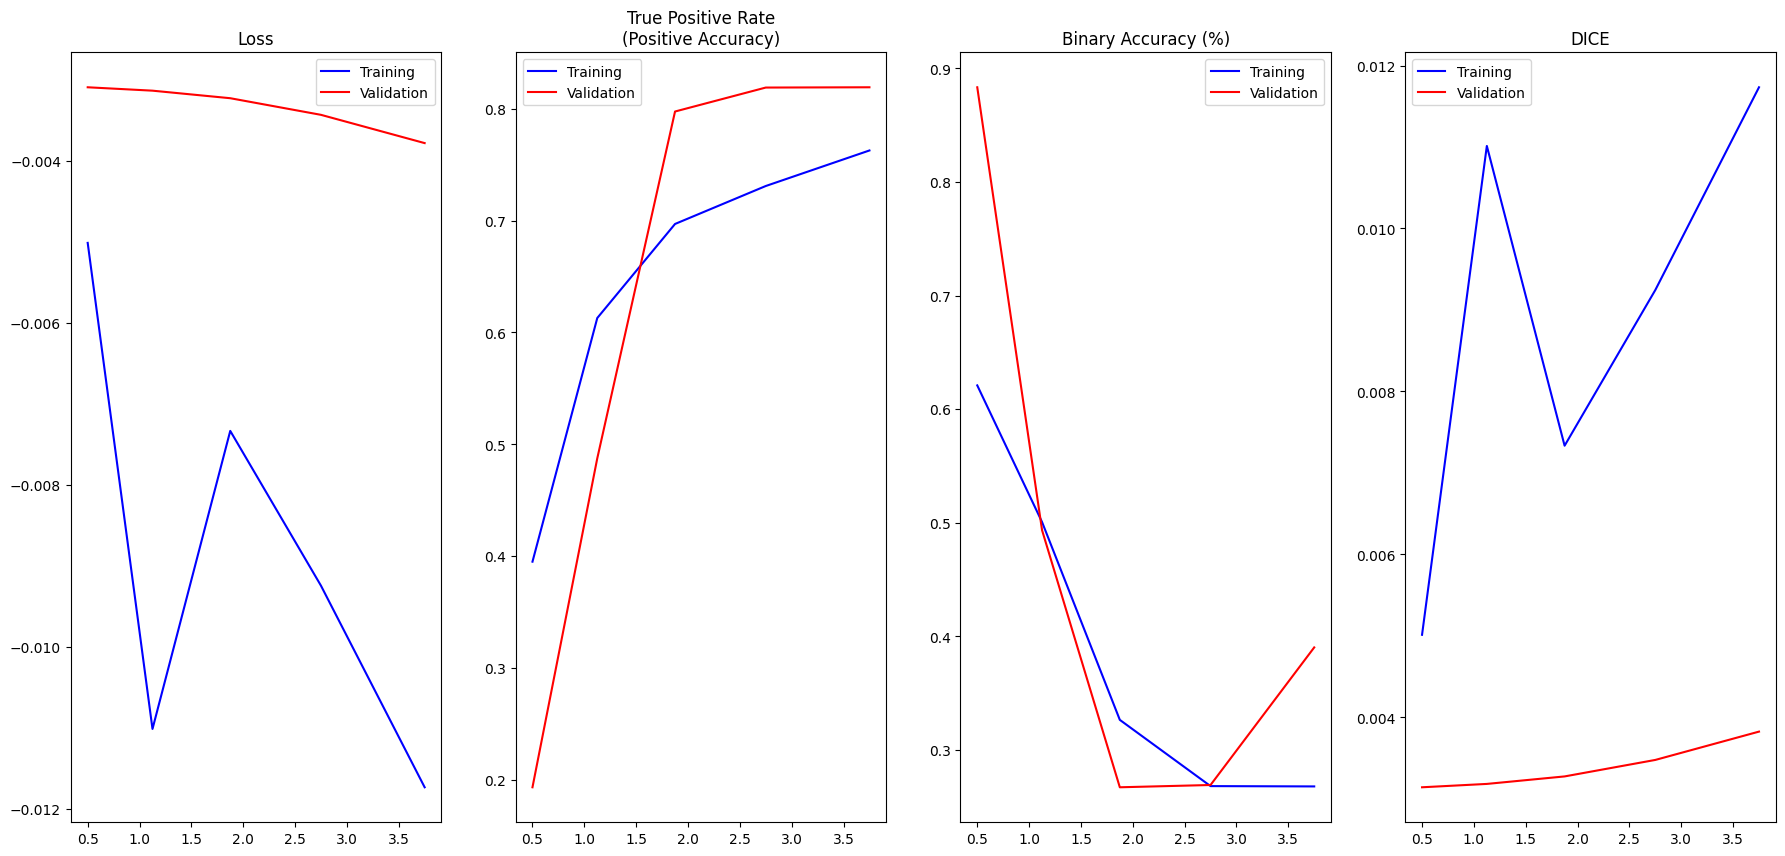

In [ ]:
def show_loss(loss_history):
    epich = np.cumsum(np.concatenate(
        [np.linspace(0.5, 1, len(mh.epoch)) for mh in loss_history]))
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(22, 10))
    _ = ax1.plot(epich,
                 np.concatenate([mh.history['loss'] for mh in loss_history]),
                 'b-',
                 epich, np.concatenate(
            [mh.history['val_loss'] for mh in loss_history]), 'r-')
    ax1.legend(['Training', 'Validation'])
    ax1.set_title('Loss')

    _ = ax2.plot(epich, np.concatenate(
        [mh.history['true_positive_rate'] for mh in loss_history]), 'b-',
                     epich, np.concatenate(
            [mh.history['val_true_positive_rate'] for mh in loss_history]),
                     'r-')
    ax2.legend(['Training', 'Validation'])
    ax2.set_title('True Positive Rate\n(Positive Accuracy)')

    _ = ax3.plot(epich, np.concatenate(
        [mh.history['binary_accuracy'] for mh in loss_history]), 'b-',
                     epich, np.concatenate(
            [mh.history['val_binary_accuracy'] for mh in loss_history]),
                     'r-')
    ax3.legend(['Training', 'Validation'])
    ax3.set_title('Binary Accuracy (%)')

    _ = ax4.plot(epich, np.concatenate(
        [mh.history['dice_coef'] for mh in loss_history]), 'b-',
                     epich, np.concatenate(
            [mh.history['val_dice_coef'] for mh in loss_history]),
                     'r-')
    ax4.legend(['Training', 'Validation'])
    ax4.set_title('DICE')

show_loss(loss_history)

In [ ]:
# seg_model.load_weights(weight_path)
# seg_model.save('seg_model.h5')
fullres_model = seg_model
fullres_model.save('fullres_model & weights/fullres_model.h5')

In [ ]:
#!pip install opencv-python
import tensorflow as tf
import cv2
rgb_path = os.path.join(test_image_dir,'00dc34840.jpg')#'00c3db267.jpg')
img = cv2.imread(rgb_path)/255
img = img[::IMG_SCALING[0], ::IMG_SCALING[1]]
img = tf.expand_dims(img, axis=0)
pred = fullres_model.predict(img)
print(pred[pred<0])

1/1 [==============================] - 0s 415ms/step
[]


In [ ]:
def gen_pred(test_dir, img, model):
    rgb_path = os.path.join(test_image_dir,img)
    img = cv2.imread(rgb_path)
    img = img[::IMG_SCALING[0], ::IMG_SCALING[1]]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img/255
    img = tf.expand_dims(img, axis=0)
    pred = model.predict(img)
    pred = np.squeeze(pred, axis=0)
    return cv2.imread(rgb_path), pred

1/1 [==============================] - 0s 27ms/step


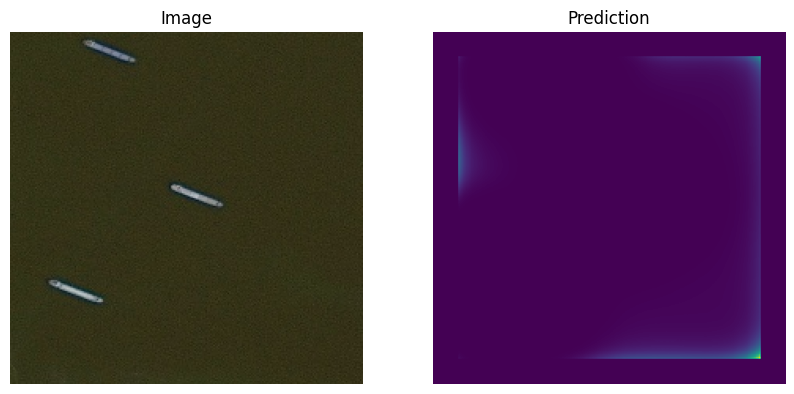

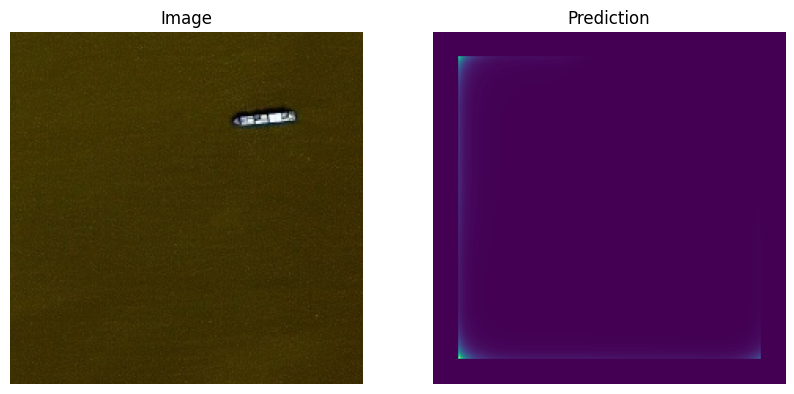

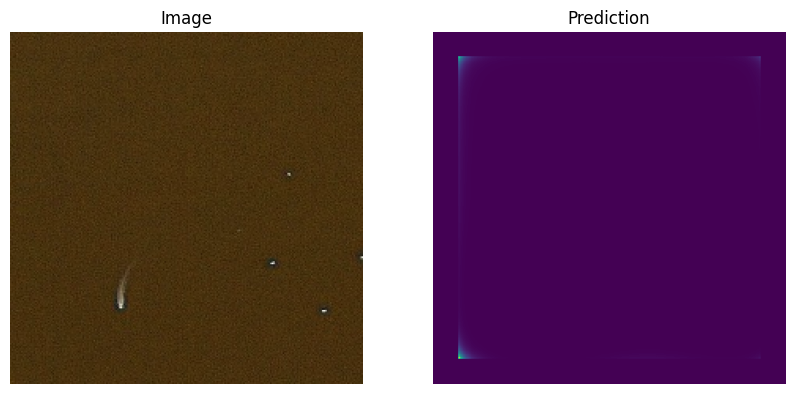

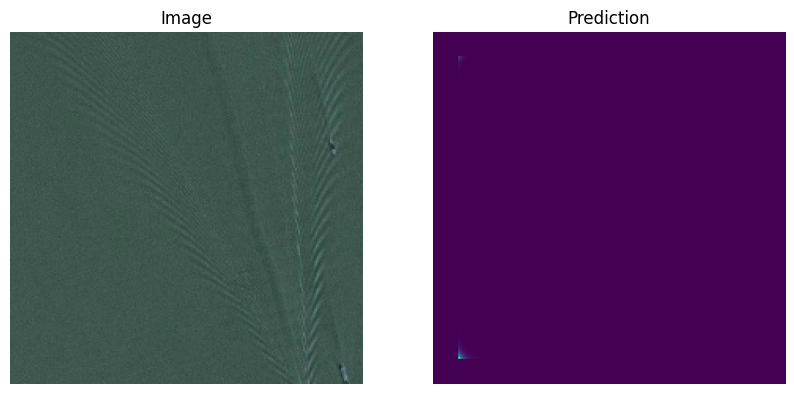

In [ ]:
from matplotlib import pyplot as plt
test_imgs = ['00dc34840.jpg', '00c3db267.jpg', '00aa79c47.jpg', '00a3a9d72.jpg']
%matplotlib inline

rows = 1
columns = 2
for i in range(len(test_imgs)):
    img, pred = gen_pred(test_image_dir, test_imgs[i], fullres_model)
    fig = plt.figure(figsize=(10, 7))
    fig.add_subplot(rows, columns, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Image")
    fig.add_subplot(rows, columns, 2)
    plt.imshow(pred, interpolation=None)
    plt.axis('off')
    plt.title("Prediction")

In [ ]:
pred_y = seg_model.predict(valid_x)
print(pred_y.shape, pred_y.min(), pred_y.max(), pred_y.mean())

13/13 [==============================] - 1s 74ms/step
(400, 224, 224, 1) 0.0 0.9229204 0.39814818


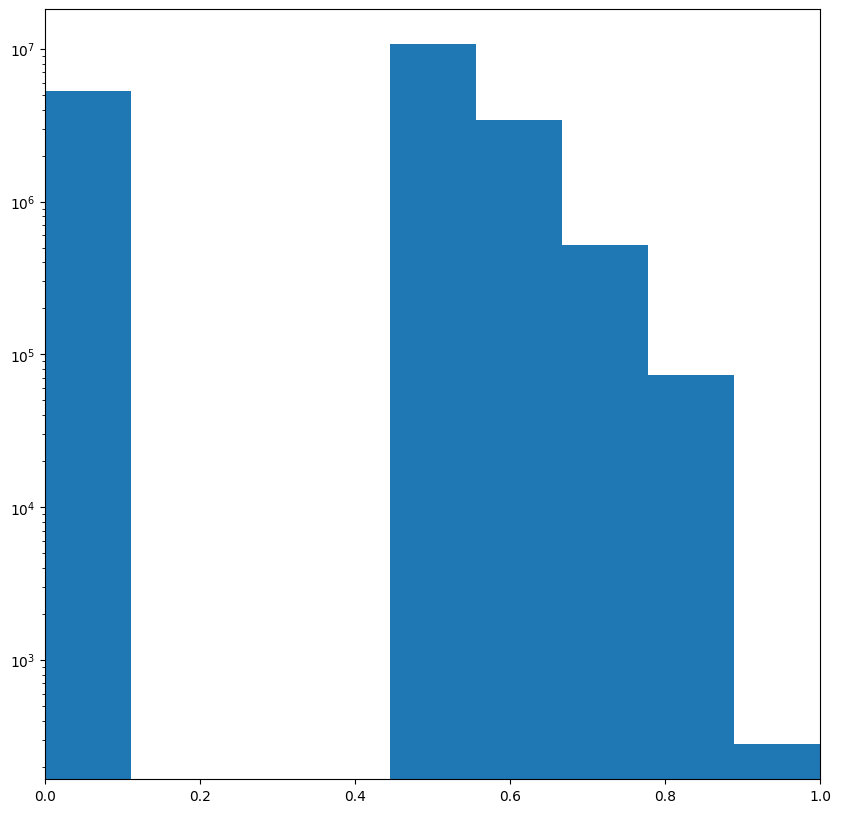

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.hist(pred_y.ravel(), np.linspace(0, 1, 10))
ax.set_xlim(0, 1)
ax.set_yscale('log')

In [ ]:
if IMG_SCALING is not None:
    fullres_model = models.Sequential()
    fullres_model.add(layers.AvgPool2D(IMG_SCALING, input_shape = (None, None, 3)))
    fullres_model.add(seg_model)
    fullres_model.add(layers.UpSampling2D(IMG_SCALING))
else:
    fullres_model = seg_model
fullres_model.save('fullres_model.h5')

In [ ]:
test_paths = os.listdir(test_image_dir)
print(len(test_paths), 'test images found')

15606 test images found


1/1 [==============================] - 0s 35ms/step


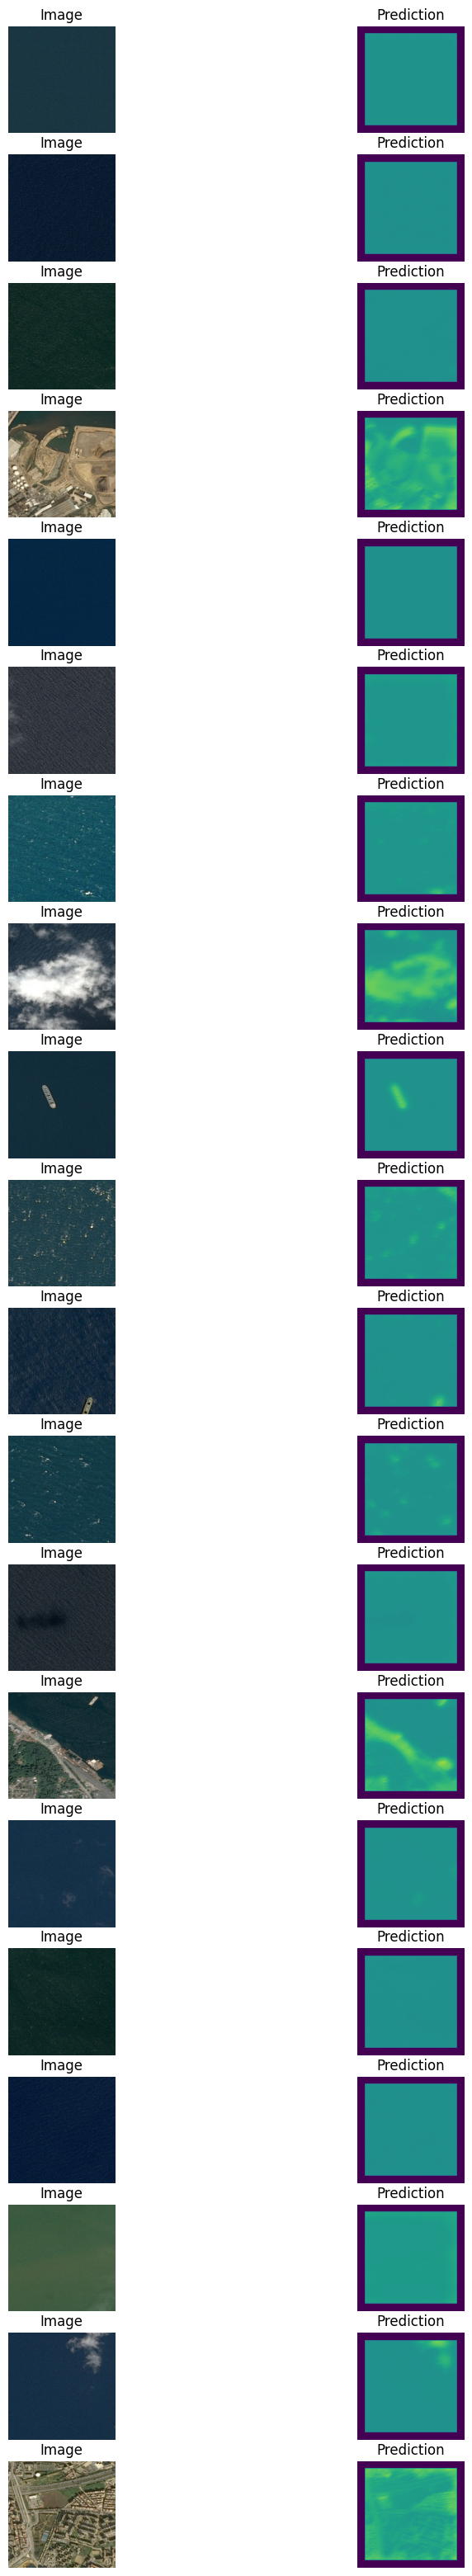

In [ ]:
fig, m_axs = plt.subplots(20, 2, figsize = (10, 40))
[c_ax.axis('off') for c_ax in m_axs.flatten()]
for (ax1, ax2), c_img_name in zip(m_axs, test_paths):
    c_path = os.path.join(test_image_dir, c_img_name)
    c_img = imread(c_path)
    first_img = np.expand_dims(c_img, 0)/255.0
    first_seg = fullres_model.predict(first_img)
    ax1.imshow(first_img[0])
    ax1.set_title('Image')
    ax2.imshow(first_seg[0, :, :, 0], vmin = 0, vmax = 1)
    ax2.set_title('Prediction')
fig.savefig('test_predictions.png')